<a href="https://colab.research.google.com/github/vivekr25/heart-disease-analysis/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction – Data Exploration
This notebook performs basic exploration on the heart.csv dataset from Kaggle.

In [1]:
import pandas as pd

# Load the heart failure dataset
df = pd.read_csv('heart.csv')

# Preview the first few rows
print("Sample data:")
print(df.head())

# Check shape and column info
print("\nNumber of rows and columns:", df.shape)
print("\nColumn names and data types:")
print(df.info())

Sample data:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Number of rows and columns: (918, 12)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         

In [2]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak

In [3]:
# Finding how many patients have heart disease
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [4]:
# Average Age
average_age = round(df['Age'].mean())
print(f"The average age of the patients is {average_age} years")

The average age of the patients is 54 years


See if older patients are at higher risk

In [5]:
# Create two groups
older = df[df['Age'] >= 60]
younger = df[df['Age'] < 60]

# Calculate heart disease rate for each group
older_rate = (older['HeartDisease'].sum() / len(older)) * 100
younger_rate = (younger['HeartDisease'].sum() / len(younger)) * 100

# Print the results, rounded to 1 decimal
print(f"Heart disease rate in older patients (60+): {older_rate:.1f}%")
print(f"Heart disease rate in younger patients (<60): {younger_rate:.1f}%")

Heart disease rate in older patients (60+): 73.1%
Heart disease rate in younger patients (<60): 48.6%


 Do older patients have higher risk of heart disease?

To explore this, we split the patients into two groups:
- Age 60 and above
- Under age 60

We then calculated the percentage of patients with heart disease in each group:

- **Older patients (60+): 73.1%**
- **Younger patients (<60): 48.6%**

🔍 **Conclusion**: Older patients in this dataset have a significantly higher rate of heart disease.

In [6]:
# Total number of patients in the full dataset
print("Total patients:", len(df))

# Number of older patients (age 60+)
older = df[df['Age'] >= 60]
print("Older patients:", len(older))

# Number of younger patients
younger = df[df['Age'] < 60]
print("Younger patients:", len(younger))

Total patients: 918
Older patients: 253
Younger patients: 665


# Finding which chest pain type was reported the most

In [7]:
# Count heart disease cases by Chest Pain Type
chest_vs_disease = df.groupby('ChestPainType')['HeartDisease'].value_counts().unstack()
print(chest_vs_disease)

HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


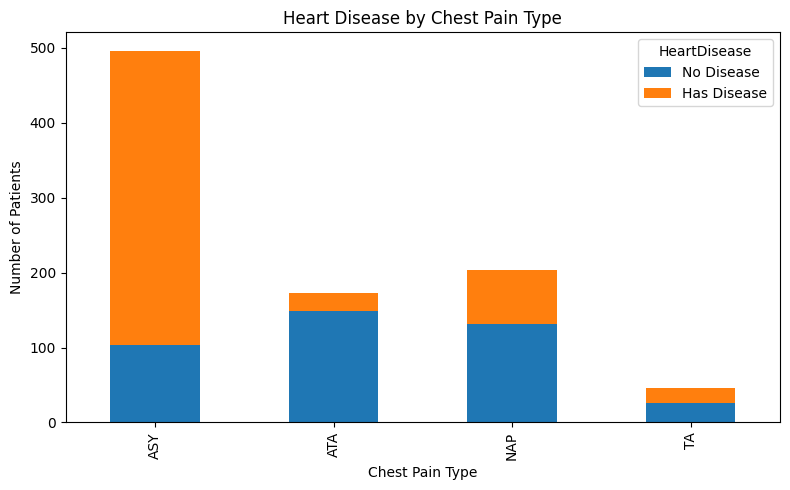

In [8]:
import matplotlib.pyplot as plt

# Bar chart: Chest pain type vs heart disease
chest_vs_disease.plot(kind='bar', stacked=True, figsize=(8,5))

# Titles and labels
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Has Disease"], title="HeartDisease")
plt.tight_layout()

# Show the chart
plt.show()

### Chest Pain Type vs. Heart Disease

This bar chart shows the number of patients with and without heart disease across different chest pain types.

- Most patients with **asymptomatic chest pain (ASY)** have heart disease.
- **ATA** and **NAP** are more common in patients without heart disease.

🔍 This insight may help prioritize further cardiac screening for patients reporting ASY chest pain.

Heart disease cases by Gender

In [9]:
# Group by Sex and HeartDisease
gender_vs_disease = df.groupby('Sex')['HeartDisease'].value_counts().unstack()
print(gender_vs_disease)

HeartDisease    0    1
Sex                   
F             143   50
M             267  458


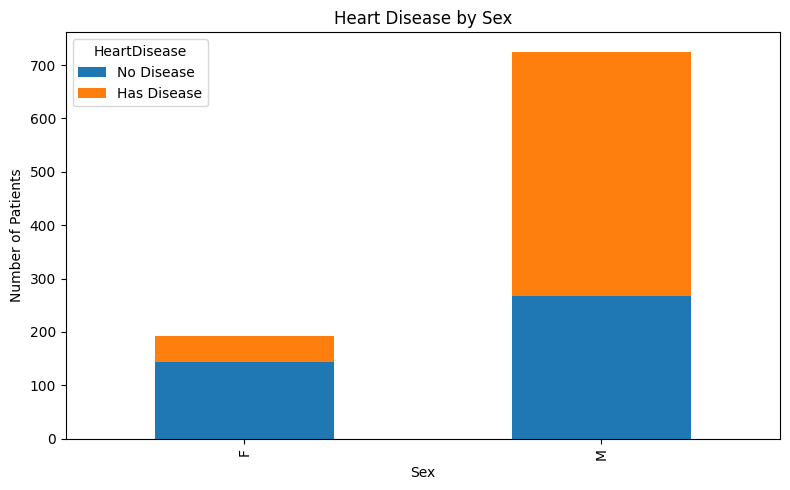

In [10]:
# Bar Chart : Sex vs Heart Disease
gender_vs_disease.plot(kind='bar', stacked=True, figsize=(8,5))

# Titles and labels
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Has Disease"], title="HeartDisease")
plt.tight_layout()

# Show the chart
plt.show()

### Heart Disease Risk by Gender

The chart shows the number of patients with and without heart disease, grouped by sex:

- Among **male patients**, a large majority (458) have heart disease.
- Among **female patients**, the majority (143) do **not** have heart disease.

🔍 This suggests that in this dataset, **male patients are more likely to have heart disease**.

### What Do the Chest Pain Types Mean?

- **ASY (Asymptomatic)**: No chest pain reported, but other clinical signs may suggest heart issues. This type is often linked to silent or undetected heart disease.
- **ATA (Atypical Angina)**: Chest discomfort not clearly linked to heart problems. May vary with breathing, movement, or position.
- **NAP (Non-Anginal Pain)**: Chest pain likely caused by non-heart issues such as muscle strain, anxiety, or digestion.
- **TA (Typical Angina)**: Classic heart-related chest pain, often triggered by exertion and relieved with rest. Strongly associated with coronary artery disease.

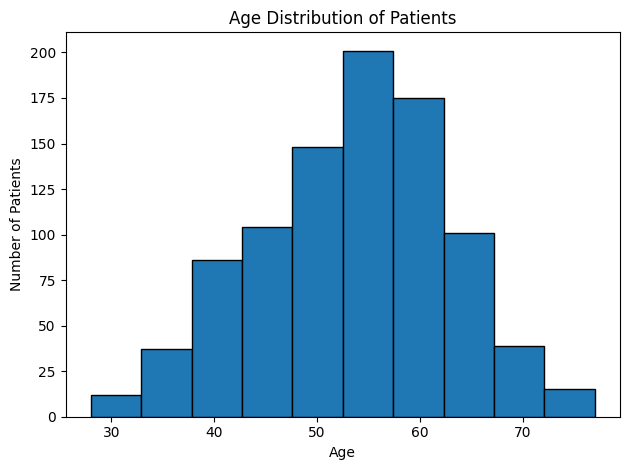

In [11]:
import matplotlib.pyplot as plt

# Histogram: Age distribution
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

The majority of heart-related data points are for middle-aged to older adults.

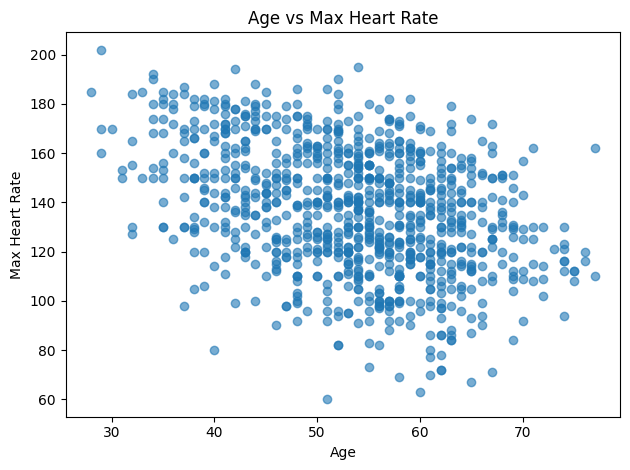

In [12]:
# Scatter plot: Age vs Max Heart Rate
plt.scatter(df['Age'], df['MaxHR'], alpha=0.6)
plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.tight_layout()
plt.show()

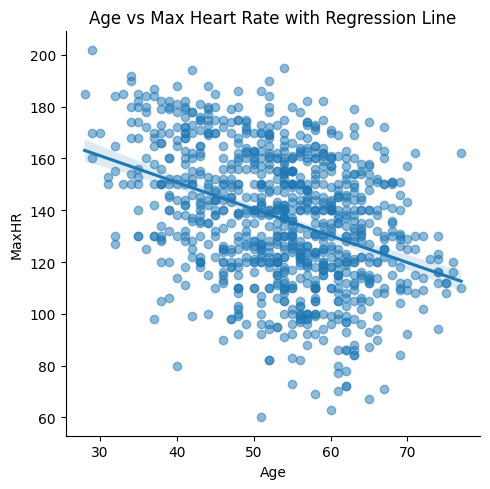

In [13]:
import seaborn as sns
# Regression plot: Age vs Max Heart Rate
sns.lmplot(data=df, x='Age', y='MaxHR', scatter_kws={'alpha':0.5})
plt.title("Age vs Max Heart Rate with Regression Line")
plt.tight_layout()
plt.show()

The regression line confirms there is a negative relationship between Age and Heart Rate. As age increases, heart rates decreases.

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

In [16]:
grouped = df.groupby('AgeGroup', observed=False)['Cholesterol'].mean()

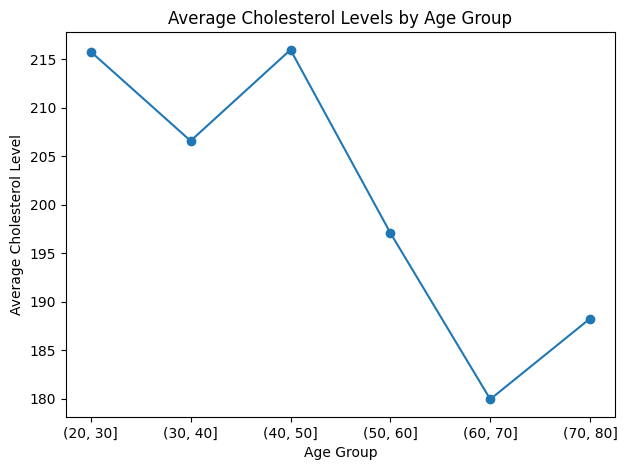

In [19]:
grouped.sort_index().plot(kind='line', marker='o')
plt.title("Average Cholesterol Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Cholesterol Level")
plt.tight_layout()
plt.show()

Average Cholesterol Levels by Age Group

This chart shows the average cholesterol levels for different age groups in the dataset.
	•	Purpose: To understand how cholesterol levels vary with age.
	•	Observation:
	•	Cholesterol levels appear to peak around the 40–50 age group.
	•	There’s a declining trend in older age groups (50+), with a slight increase again in the 70–80 range.
	•	This could reflect lifestyle changes, medical interventions, or survivorship bias.

📌 Grouping by age ranges helps spot general trends more clearly than using raw age values.